# 輪郭の抽出とは

「輪郭抽出」とは、同じ色を持つ連続する点をつなげた曲線を抽出すること！

# GaussianBlur

一般的な平滑化：カーネル内の画素を一定値で塗りつぶす
Gaussianフィルタ：中心に近いほど値が一番大きく、離れるにつれて値は小さくなる

GaussianBlur(img, (ax, ay), sigma_x)

### 引数の説明
GaussianBlur(画像データ, (ぼかしの強さ,ぼかしの強さ), 横方向の標準偏差, 縦方向の標準偏差)

標準偏差に０を指定すると、カーネルサイズから標準偏差が自動計算される
標準偏差の値が小さいほど、よりカーネルの中心に強くぼかしがかかり、
値が大きいほど、より均一にカーネル全体にぼかしがかかるようになる

→標準偏差は0でOK！

画像におけるカーネルとは：
https://www.frontier.maxell.co.jp/blog/posts/12.html

# 画像の二値化とは

像を白と黒の2階調に変換する処理のこと

https://qiita.com/shoku-pan/items/883901c68719abbc7a78

cv2.threshhold

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#:~:text=%E9%96%A2%E6%95%B0%E3%81%AF%20cv2.threshold%20%E3%82%92,%E3%81%A6%E5%89%B2%E3%82%8A%E5%BD%93%E3%81%A6%E3%82%89%E3%82%8C%E3%82%8B%E5%80%A4%E3%81%A7%E3%81%99%EF%BC%8E

threshold(グレースケール画像, 　閾値, 　閾値以上の値を持つ値に対して割り当てる値, 　どのように二値化を行うか)         
threshold(img, thresh, maxval, type)

THRESH_BINARY_INV：閾値よりも大きな値であれば0、それ以外はmaxvalの値にする

97 64 30 28
101 9 90 81


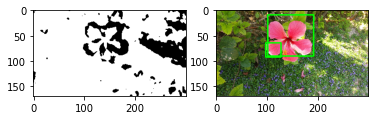

In [4]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

# 色空間を二値化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# GaussianBlur(画像データ,  (ぼかしの強さ,ぼかしの強さ), 横方向の標準偏差, 縦方向の標準偏差)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# threshold(グレースケール画像, 　閾値, 　閾値以上の値を持つ値に対して割り当てる値, 　どのように二値化を行うか)
# THRESH_BINARY_INV：閾値よりも大きな値であれば0、それ以外はmaxvalの値にする
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 画面左側に二値化した画像を描画
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭を抽出
cnts = cv2.findContours(im2,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
# 抽出した枠を描画
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎたり領域を除去
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 結果を出力
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 画面右側に抽出結果を描画
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()

### 練習
上記のソースコードをサンプルにし、自分の好きな画像の輪郭を抽出し、
結果として、matplotの領域左側に二値化した画像を、
右側に検出した輪郭に青い線を描画した画像を表示しましょう。

画像サイズが大きすぎる場合は、縮小処理を行うこと
細かすぎる輪郭は輪郭として検出されないよう微調整を行うこと


88 124 194 19
150 84 43 15
125 55 84 21


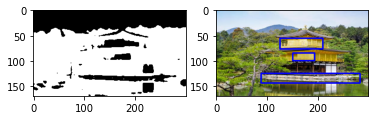

In [11]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ
img = cv2.imread("tera.jpeg")
img = cv2.resize(img, (300, 169))

# 色空間を二値化
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# GaussianBlur(画像データ,  (ぼかしの強さ,ぼかしの強さ), 横方向の標準偏差, 縦方向の標準偏差)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# threshold(グレースケール画像, 　閾値, 　閾値以上の値を持つ値に対して割り当てる値, 　どのように二値化を行うか)
# THRESH_BINARY_INV：閾値よりも大きな値であれば0、それ以外はmaxvalの値にする
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 画面左側に二値化した画像を描画
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭を抽出
cnts = cv2.findContours(im2,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
# 抽出した枠を描画
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎたり領域を除去
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 結果を出力
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 画面右側に抽出結果を描画
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours_test.png", dpi=200)
plt.show()